# 주식 시세 현황 분석

네이버 주식에서 특정 기업의 주가를 가져와 데이터 프레임에 넣고, 그래프로 표시하는 실습

In [34]:
# 웹 스크래핑 가능 유무 확인을 위한 모듈 탑재
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page=2'

# GET으로 해당 URL의 정보를 가져오기
page = requests.get(url)

In [35]:
# 정보를 txt 형태로 출력
print(page.text)


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버 :: 세상의 모든 지식, 네이버</title>

<style type="text/css">
.error_content * {margin:0;padding:0;}
.error_content img{border:none;}
.error_content em {font-style:normal;}
.error_content {width:410px; margin:80px auto 0; padding:57px 0 0 0; font-size:12px; font-family:"나눔고딕", "NanumGothic", "돋움", Dotum, AppleGothic, Sans-serif; text-align:left; line-height:14px; background:url(https://ssl.pstatic.net/static/common/error/090610/bg_thumb.gif) no-repeat center top; white-space:nowrap;}
.error_content p{margin:0;}
.error_content .error_desc {margin-bottom:21px; overflow:hidden; text-align:center;}
.error_content .error_desc2 {margin-bottom:11px; padding-bottom:7px; color:#888; line-height:18px; border-bottom:1px solid #eee;}
.error_content .error_desc3 {clear:both; color:#888;}
.error_content .error_desc3

In [36]:
# 헤더 정보 설정
my_headers = {'user-agent': 'Mozilla/5.0'}

page = requests.get(url, headers=my_headers)

In [37]:
print(page.text)


<html lang="ko">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">
<title>네이버페이 증권</title>

<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241226190829/css/newstock.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241226190829/css/common.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241226190829/css/finance_header.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241226190829/css/layout.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241226190829/css/main.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241226190829/css/newstock2.css">
<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20241226190829/css/newstock3.css">
<link rel="stylesheet" type

In [38]:
# Pandas 라이브러리 사용
import pandas as pd

pages = pd.read_html(page.text)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20612\716553321.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  pages = pd.read_html(page.text)


In [39]:
type(pages)

list

In [40]:
len(pages)

2

In [41]:
pages[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.12.12,55900.0,"상승 1,900",54000.0,56500.0,53900.0,33476698.0
2,2024.12.11,54000.0,보합0,53600.0,54200.0,53400.0,14565947.0
3,2024.12.10,54000.0,상승 600,54500.0,54500.0,53700.0,20783970.0
4,2024.12.09,53400.0,하락 700,53500.0,54600.0,53200.0,26227680.0
5,2024.12.06,54100.0,상승 400,53900.0,54400.0,52700.0,22861874.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024.12.05,53700.0,상승 600,53200.0,54400.0,53200.0,23588277.0


In [42]:
pages[1]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,맨앞,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [43]:
# 페이지 번호를 제외한 주소
new_url = 'https://finance.naver.com/item/sise_day.naver?code=005930&page='

# 데이터 프레임 생성
all_tables = pd.DataFrame()

for page_number in range(1, 5):

  # 페이지 번호 추가한 주소
  full_url = new_url + str(page_number)

  # 주소 확인
  print(f'{page_number} 번째 페이지 읽어오기({full_url})')

  page = requests.get(full_url, headers=my_headers)

  table = pd.read_html(page.text)[0]

  print(f'전체 {len(all_tables.index)} 줄에 {len(table.index)} 줄 추가\n')

  # 데이터 축적용 테이블에 데이터 프레임 추가
  all_tables = pd.concat([all_tables, table], ignore_index=True)

1 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=1)
전체 0 줄에 15 줄 추가

2 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=2)
전체 15 줄에 15 줄 추가

3 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=3)
전체 30 줄에 15 줄 추가

4 번째 페이지 읽어오기(https://finance.naver.com/item/sise_day.naver?code=005930&page=4)
전체 45 줄에 15 줄 추가



C:\Users\Admin\AppData\Local\Temp\ipykernel_20612\2605988087.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_20612\2605988087.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_20612\2605988087.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(page.text)[0]
C:\Users\Admin\AppData\Local\Temp\ipykernel_20612\2605988087.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To r

In [44]:
# 전체 테이블 결과 확인
all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024.12.27,53400.0,하락 200,53500.0,54100.0,53200.0,5355331.0
2,2024.12.26,53600.0,하락 800,54500.0,54600.0,53500.0,10517075.0
3,2024.12.24,54400.0,상승 900,53700.0,54500.0,53600.0,11634677.0
4,2024.12.23,53500.0,상승 500,53400.0,54000.0,53300.0,13672650.0
5,2024.12.20,53000.0,하락 100,52700.0,53100.0,51900.0,24674774.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2024.12.19,53100.0,"하락 1,800",53500.0,53800.0,53100.0,22481925.0


In [45]:
# 비어있는 데이터 삭제 후 확인
all_tables.dropna(inplace=True)

all_tables

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.12.27,53400.0,하락 200,53500.0,54100.0,53200.0,5355331.0
2,2024.12.26,53600.0,하락 800,54500.0,54600.0,53500.0,10517075.0
3,2024.12.24,54400.0,상승 900,53700.0,54500.0,53600.0,11634677.0
4,2024.12.23,53500.0,상승 500,53400.0,54000.0,53300.0,13672650.0
5,2024.12.20,53000.0,하락 100,52700.0,53100.0,51900.0,24674774.0
9,2024.12.19,53100.0,"하락 1,800",53500.0,53800.0,53100.0,22481925.0
10,2024.12.18,54900.0,상승 700,54100.0,55400.0,54000.0,13698937.0
11,2024.12.17,54200.0,"하락 1,400",54700.0,55200.0,54000.0,20215230.0
12,2024.12.16,55600.0,하락 500,56300.0,56600.0,55200.0,15277277.0
13,2024.12.13,56100.0,상승 200,55800.0,56300.0,55500.0,15908823.0


In [46]:
# 컬럼 네이밍 영어로 변경 후 확인
all_tables.rename(columns={
    '날짜': 'date',
    '종가': 'end_price',
    '고가': 'highest_price',
    '시가': 'start_price',
    '저가': 'lowest_price'
}, inplace=True)

all_tables

,date,end_price,전일비,start_price,highest_price,lowest_price,거래량
1,2024.12.27,53400.0,하락 200,53500.0,54100.0,53200.0,5355331.0
2,2024.12.26,53600.0,하락 800,54500.0,54600.0,53500.0,10517075.0
3,2024.12.24,54400.0,상승 900,53700.0,54500.0,53600.0,11634677.0
4,2024.12.23,53500.0,상승 500,53400.0,54000.0,53300.0,13672650.0
5,2024.12.20,53000.0,하락 100,52700.0,53100.0,51900.0,24674774.0
9,2024.12.19,53100.0,"하락 1,800",53500.0,53800.0,53100.0,22481925.0
10,2024.12.18,54900.0,상승 700,54100.0,55400.0,54000.0,13698937.0
11,2024.12.17,54200.0,"하락 1,400",54700.0,55200.0,54000.0,20215230.0
12,2024.12.16,55600.0,하락 500,56300.0,56600.0,55200.0,15277277.0
13,2024.12.13,56100.0,상승 200,55800.0,56300.0,55500.0,15908823.0


In [47]:
# 전일비, 거래량 제거
all_tables.drop(['전일비', '거래량'], axis=1, inplace=True)

all_tables

,date,end_price,start_price,highest_price,lowest_price
1,2024.12.27,53400.0,53500.0,54100.0,53200.0
2,2024.12.26,53600.0,54500.0,54600.0,53500.0
3,2024.12.24,54400.0,53700.0,54500.0,53600.0
4,2024.12.23,53500.0,53400.0,54000.0,53300.0
5,2024.12.20,53000.0,52700.0,53100.0,51900.0
9,2024.12.19,53100.0,53500.0,53800.0,53100.0
10,2024.12.18,54900.0,54100.0,55400.0,54000.0
11,2024.12.17,54200.0,54700.0,55200.0,54000.0
12,2024.12.16,55600.0,56300.0,56600.0,55200.0
13,2024.12.13,56100.0,55800.0,56300.0,55500.0


In [48]:
# 중앙값 추가
all_tables['mid_price'] = all_tables['highest_price'] - ((all_tables['highest_price'] - all_tables['lowest_price']) / 2)

all_tables

,date,end_price,start_price,highest_price,lowest_price,mid_price
1,2024.12.27,53400.0,53500.0,54100.0,53200.0,53650.0
2,2024.12.26,53600.0,54500.0,54600.0,53500.0,54050.0
3,2024.12.24,54400.0,53700.0,54500.0,53600.0,54050.0
4,2024.12.23,53500.0,53400.0,54000.0,53300.0,53650.0
5,2024.12.20,53000.0,52700.0,53100.0,51900.0,52500.0
9,2024.12.19,53100.0,53500.0,53800.0,53100.0,53450.0
10,2024.12.18,54900.0,54100.0,55400.0,54000.0,54700.0
11,2024.12.17,54200.0,54700.0,55200.0,54000.0,54600.0
12,2024.12.16,55600.0,56300.0,56600.0,55200.0,55900.0
13,2024.12.13,56100.0,55800.0,56300.0,55500.0,55900.0


In [49]:
# 월 정보 열 추가
all_tables['month'] = all_tables['date'].str[0:7]

all_tables

,date,end_price,start_price,highest_price,lowest_price,mid_price,month
1,2024.12.27,53400.0,53500.0,54100.0,53200.0,53650.0,2024.12
2,2024.12.26,53600.0,54500.0,54600.0,53500.0,54050.0,2024.12
3,2024.12.24,54400.0,53700.0,54500.0,53600.0,54050.0,2024.12
4,2024.12.23,53500.0,53400.0,54000.0,53300.0,53650.0,2024.12
5,2024.12.20,53000.0,52700.0,53100.0,51900.0,52500.0,2024.12
9,2024.12.19,53100.0,53500.0,53800.0,53100.0,53450.0,2024.12
10,2024.12.18,54900.0,54100.0,55400.0,54000.0,54700.0,2024.12
11,2024.12.17,54200.0,54700.0,55200.0,54000.0,54600.0,2024.12
12,2024.12.16,55600.0,56300.0,56600.0,55200.0,55900.0,2024.12
13,2024.12.13,56100.0,55800.0,56300.0,55500.0,55900.0,2024.12


In [50]:
# 날짜를 색인으로 지정
all_tables.set_index('date', inplace=True)

# 날짜를 오름차순으로 정렬
all_tables.sort_index(inplace=True)

all_tables

,end_price,start_price,highest_price,lowest_price,mid_price,month
date,,,,,,
2024.11.01,58300.0,59000.0,59600.0,58100.0,58850.0,2024.11
2024.11.04,58700.0,58600.0,59400.0,58400.0,58900.0,2024.11
2024.11.05,57600.0,57800.0,58100.0,57200.0,57650.0,2024.11
2024.11.06,57300.0,57600.0,58000.0,56300.0,57150.0,2024.11
2024.11.07,57500.0,56900.0,58100.0,56800.0,57450.0,2024.11
2024.11.08,57000.0,58000.0,58300.0,57000.0,57650.0,2024.11
2024.11.11,55000.0,56700.0,56800.0,55000.0,55900.0,2024.11
2024.11.12,53000.0,54600.0,54600.0,53000.0,53800.0,2024.11
2024.11.13,50600.0,52000.0,53000.0,50500.0,51750.0,2024.11


<Axes: xlabel='date'>

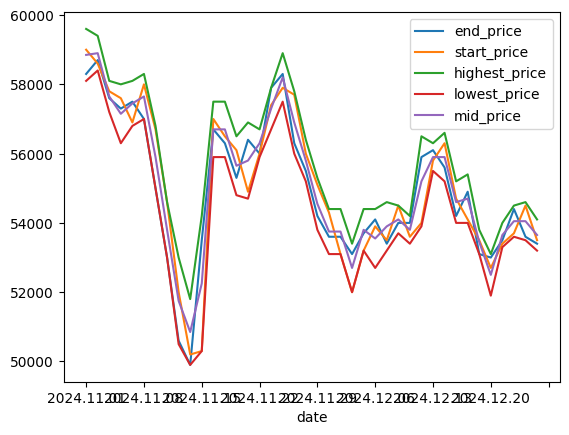

In [51]:
# 선 그래프로 그리기
all_tables.plot.line()

<Axes: xlabel='date'>

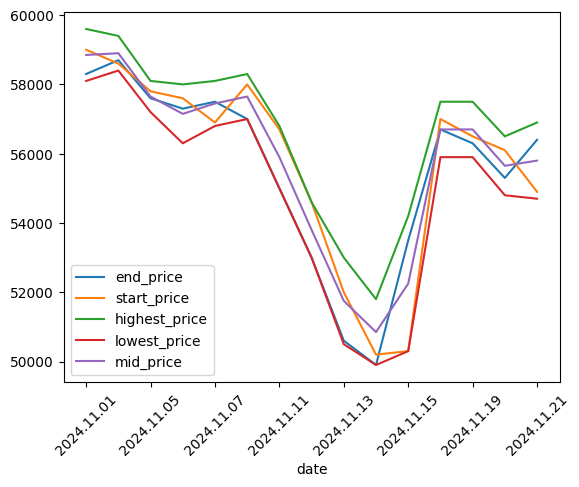

In [52]:
# 앞 15일치 데이터 선 그래프로 그리기
all_tables[:15].plot.line(rot=45)

<Axes: title={'center': 'mid_price'}, xlabel='[month]'>

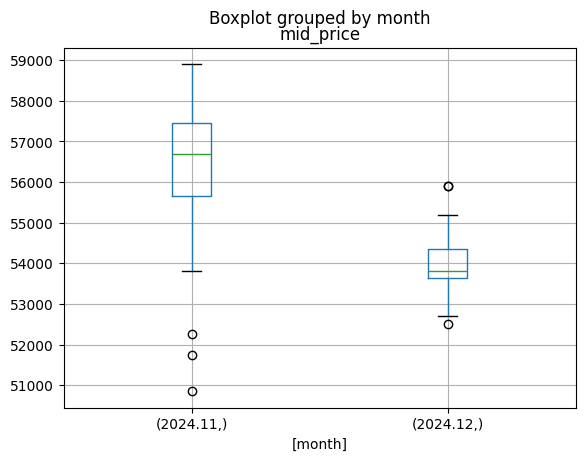

In [53]:
# 일일 시세 중간값의 박스 수영 그래프 그리기
all_tables.boxplot(column=['mid_price'], by=['month'])